<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-исходных-данных" data-toc-modified-id="Загрузка-исходных-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка исходных данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Анализ данных</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Обучение-на-исходных-данных" data-toc-modified-id="Обучение-на-исходных-данных-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Обучение на исходных данных</a></span></li><li><span><a href="#Обучение-на-преобразованных-данных" data-toc-modified-id="Обучение-на-преобразованных-данных-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Обучение на преобразованных данных</a></span></li><li><span><a href="#Реализация-линейной-регрессии" data-toc-modified-id="Реализация-линейной-регрессии-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Реализация линейной регрессии</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
# Импорт необходимых библиотек

# Импорт библиотеки pandas для манипуляции и анализа данных
import pandas as pd

# Импорт библиотеки numpy для численных вычислений
import numpy as np

# Импорт функции pascal из модуля scipy.linalg
from scipy.linalg import pascal

# Импорт модулей plotly express и graph_objects для интерактивной визуализации
import plotly.express as px
import plotly.graph_objects as go

# Импорт модуля matplotlib.pyplot для статической визуализации
import matplotlib.pyplot as plt

# Импорт библиотеки seaborn для визуализации данных
import seaborn as sns

# Импорт модели LinearRegression из библиотеки scikit-learn
from sklearn.linear_model import LinearRegression

# Импорт функции train_test_split из библиотеки scikit-learn для разделения данных
from sklearn.model_selection import train_test_split

# Импорт функции r2_score из библиотеки scikit-learn для оценки производительности модели
from sklearn.metrics import r2_score

In [3]:
# Выводим информацию о версиях установленных библиотек
!pip show pandas numpy seaborn matplotlib plotly scikit-learn scipy

Name: pandas
Version: 1.2.4
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: /opt/conda/lib/python3.9/site-packages
Requires: python-dateutil, pytz, numpy
Required-by: statsmodels, seaborn, catboost
---
Name: numpy
Version: 1.21.1
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: None
License: BSD
Location: /opt/conda/lib/python3.9/site-packages
Requires: 
Required-by: xgboost, transformers, thinc, tensorflow-cpu, tensorboard, statsmodels, spacy, seaborn, scipy, scikit-learn, pyod, pyarrow, patsy, pandas, opt-einsum, numba, matplotlib, lightgbm, Keras-Preprocessing, h5py, gensim, folium, catboost, blis
---
Name: seaborn
Version: 0.11.1
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mw

**Задание значения random_state**

In [2]:
# Устанавливаем значение random_state равным 12345678
random_state = 12345678

### Загрузка исходных данных

**Исходные данные представлены в одном файле. Мы загрузим эти данные и выполним их предварительную оценку.**

In [4]:
# Загрузка данных из CSV файла в DataFrame с помощью функции read_csv()
# Попытаемся прочитать CSV-файл из локального пути '/datasets/insurance.csv'
try:
    data_pers = pd.read_csv('/datasets/insurance.csv', sep=',')
    
# Если не удалось прочитать файл локально, то выполняем код в блоке except
except:
    # Пробуем прочитать CSV-файл из удаленного источника по URL 'https://code.s3.yandex.net/datasets/insurance.csv'
    data_pers = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv', sep=',')

# В данном случае, если файл успешно загружен, данные будут храниться в переменной 'data_pers'
# Если первая попытка чтения из локального пути завершится успешно, блок 'except' не будет выполнен.

In [5]:
# Вывод первых 10 строк DataFrame
# Используем метод head() для вывода первых 10 строк DataFrame
data_pers.head(10)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


In [5]:
# Вывод информации о DataFrame
# Используем метод info() для получения информации о DataFrame
data_pers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


В соответствии с предоставленным описанием в исходных данных у нас имеется следующий состав признаков:

- Обучающие признаки:
    - Пол
    - Возраст
    - Зарплата застрахованного клиента
    - Количество членов его семьи (без учета самого клиента)

- Целевой признак:
    - Количество страховых выплат клиенту за последние 5 лет

Состав признаков полностью совпадает с предоставленным описанием.

В нашей таблице имеется 5000 записей о клиентах страховой компании, и пропусков данных нет.

Таблица содержит 2 вещественных (возраст и зарплата) и 3 целочисленных атрибута. Однако значения в вещественных атрибутах могут быть представлены целочисленными значениями без потери точности.

Для удобства использования, мы переименуем признаки на английском языке.

**Изменение названий столбцов DataFrame**

In [6]:
# Используем атрибут columns для изменения названий столбцов DataFrame
# Присваиваем новые названия столбцам в указанном порядке
data_pers.columns = ['gender', 'age', 'salary', 'family_members', 'insurance_payments']

**Преобразование типов данных столбцов**

In [7]:
# Используем метод astype() для преобразования типа данных столбца 'age' в целочисленный тип (int)
data_pers['age'] = data_pers['age'].astype('int')

# Используем метод astype() для преобразования типа данных столбца 'salary' в целочисленный тип (int)
data_pers['salary'] = data_pers['salary'].astype('int')

**Определение списка признаков и целевого признака**

In [8]:
# Создаем список признаков, включающий 'gender', 'age', 'salary' и 'family_members'
features = ['gender', 'age', 'salary', 'family_members']

# Создаем список целевого признака, который содержит только 'insurance_payments'
target = ['insurance_payments']

### Анализ данных

**Получение описательной статистики для DataFrame**

In [9]:
# Используем метод describe() для получения описательной статистики DataFrame
data_pers.describe()

,gender,age,salary,family_members,insurance_payments
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.359400,1.194200,0.148000
std,0.500049,8.440807,9900.082063,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Среди клиентов страховой компании "Хоть потоп" мужчины и женщины представлены в равных пропорциях.

По возрасту клиенты находятся в диапазоне от 18 до 65 лет, по уровню заработной платы - от 5300 до 79000 рублей, а по количеству членов семьи - от 0 (несемейные) до 6.

Число страховых выплат клиентам варьируется от 0 (отсутствие страховых случаев за рассматриваемый период) до 5.

Для оценки распределения исходных данных мы введем дополнительный признак - наличие страховых выплат (pay_count > 0).


**Добавление дополнительного признака**

In [10]:
# Присваиваем новый признак 'insurance_claims' в DataFrame data_pers
data_pers['insurance_claims'] = (data_pers['insurance_payments'] > 0).astype('int')

In [11]:
# Вывод информации о структуре данных объекта data_pers
data_pers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gender              5000 non-null   int64
 1   age                 5000 non-null   int64
 2   salary              5000 non-null   int64
 3   family_members      5000 non-null   int64
 4   insurance_payments  5000 non-null   int64
 5   insurance_claims    5000 non-null   int64
dtypes: int64(6)
memory usage: 234.5 KB


**

In [12]:
# Функция отображает основные параметры распределения числового признака и строит графики для визуализации 
# распределения значений среди действующих и ушедших клиентов, помогая оценить характеристики и связь признака 
#с целевым признаком.

def describe_column_numeric(column, title, df=data_pers):
    # Вывод основных параметров распределения значений признака
    print('Признак', column, ':')
    print(df[column].describe())
    
    # Создание графика гистограммы и "ящика с усами" с использованием библиотеки matplotlib
    fig, axes = plt.subplots(2, 1, figsize=(19, 19))
    
    # Гистограмма
    sns.histplot(data=df, x=column, ax=axes[0], hue='insurance_claims', multiple='stack', palette = {0: 'lightblue', 1: 'lightcoral'})
    axes[0].set_title(title)
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Число клиентов')
    axes[0].grid(True)  # Добавление сетки
    
    # Ящик с усами
    sns.boxplot(data=df, x='insurance_claims', y=column, ax=axes[1], palette = {0: 'lightblue', 1: 'lightcoral'})
    axes[1].set_xlabel('insurance_claims')
    axes[1].set_ylabel(column)
    axes[1].set_xticklabels(['Нет выплат', 'Есть выплаты'])
    axes[1].grid(True)  # Добавление сетки
    
    plt.tight_layout()
    plt.show()

In [13]:
# Функция выводит уникальные значения категориального признака в текстовом формате и строит график (гистограмму), 
# иллюстрирующий распределение значений признака среди действующих и ушедших клиентов. Это помогает визуально оценить 
# распределение и взаимосвязь признака с целевым признаком.

def describe_column_category(column, title, df=data_pers):
    
    # Вывод уникальных значений признака
    print('Признак', column, ':\n')
    print('Уникальные значения (процент):')
    unique_values = df[column].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    print(unique_values)
    
    # Вывод доли по целевому признаку
    print("\nДоля по целевому признаку (наличие выплат/все клиенты):")
    target_ratio = (
        df.query('insurance_claims == 1')[column].value_counts() / 
        df[column].value_counts()
    ).mul(100).round(1).astype(str) + '%'
    print(target_ratio)
    
    # Создание графика гистограммы с использованием библиотеки matplotlib
    fig, ax = plt.subplots(figsize=(19, 12))
    
    # Гистограмма
    sns.histplot(data=df, x=column, ax=ax, hue='insurance_claims', multiple='stack', palette = {0: 'lightblue', 1: 'lightcoral'})
    ax.set_title(title)
    ax.set_xlabel(column)
    ax.set_ylabel('Число клиентов')
    ax.grid(True)  # Добавление сетки
    
    plt.tight_layout()
    plt.show()

**Пол**

Признак gender :

Уникальные значения (процент):
0    50.1%
1    49.9%
Name: gender, dtype: object

Доля по целевому признаку (наличие выплат/все клиенты):
0    11.3%
1    11.2%
Name: gender, dtype: object


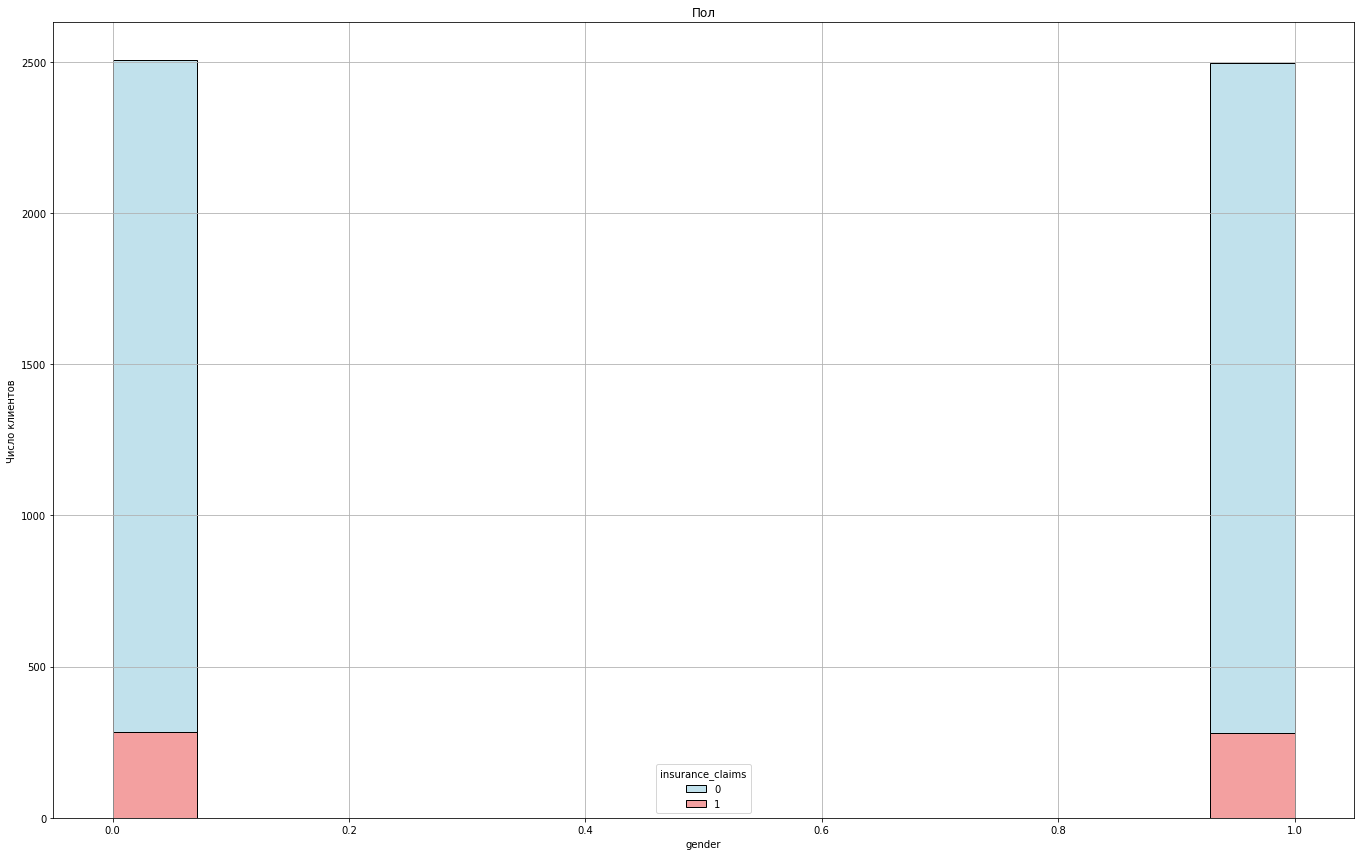

In [14]:
# Вызываем функцию для описания столбца 'gender'
describe_column_category('gender', 'Пол')

Отмечается, что клиенты равномерно представлены по полу и не наблюдается явной зависимости между полом клиента и наличием/отсутствием страховых выплат за рассматриваемый период.

**Возраст**

Признак age :
count    5000.000000
mean       30.952800
std         8.440807
min        18.000000
25%        24.000000
50%        30.000000
75%        37.000000
max        65.000000
Name: age, dtype: float64


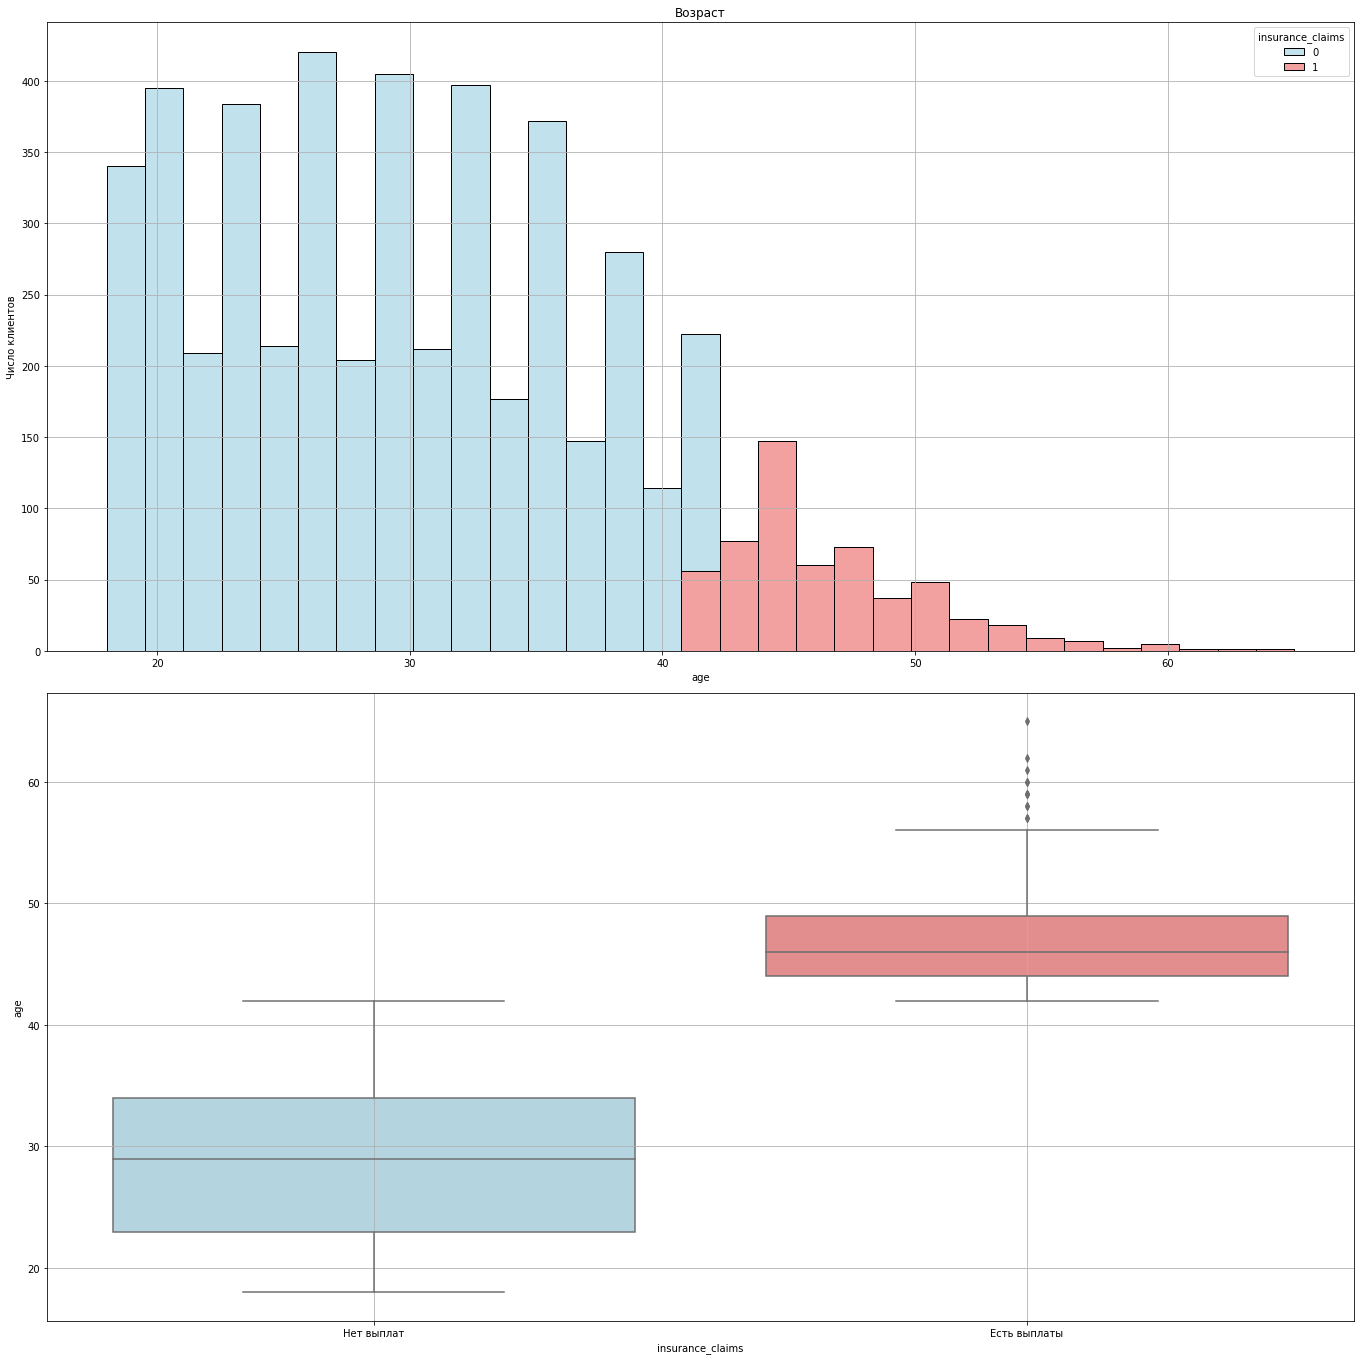

In [15]:
# Вызываем функцию для описания столбца 'age'
describe_column_numeric('age', 'Возраст')

Распределение клиентов по возрасту находится в диапазоне от 18 до 65 лет и имеет форму, близкую к распределению Пуассона, с медианным значением в 31 лет. Однако, стоит отметить, что в отношении наличия/отсутствия страховых выплат наблюдается заметное разделение по возрасту: все клиенты старше 42 лет имели страховые выплаты, в то время как клиенты моложе 42 лет не имели выплат. Только у клиентов в возрасте 42 лет было и наличие, и отсутствие страховых выплат. Данный признак имеет важное значение для обучения модели. Рекомендуется использовать стратифицированное разделение по возрасту при формировании обучающей и тестовой выборок, с учетом границы 42 лет.

**Заработная плата**

Признак salary :
count     5000.000000
mean     39916.359400
std       9900.082063
min       5300.000000
25%      33300.000000
50%      40200.000000
75%      46600.000000
max      79000.000000
Name: salary, dtype: float64


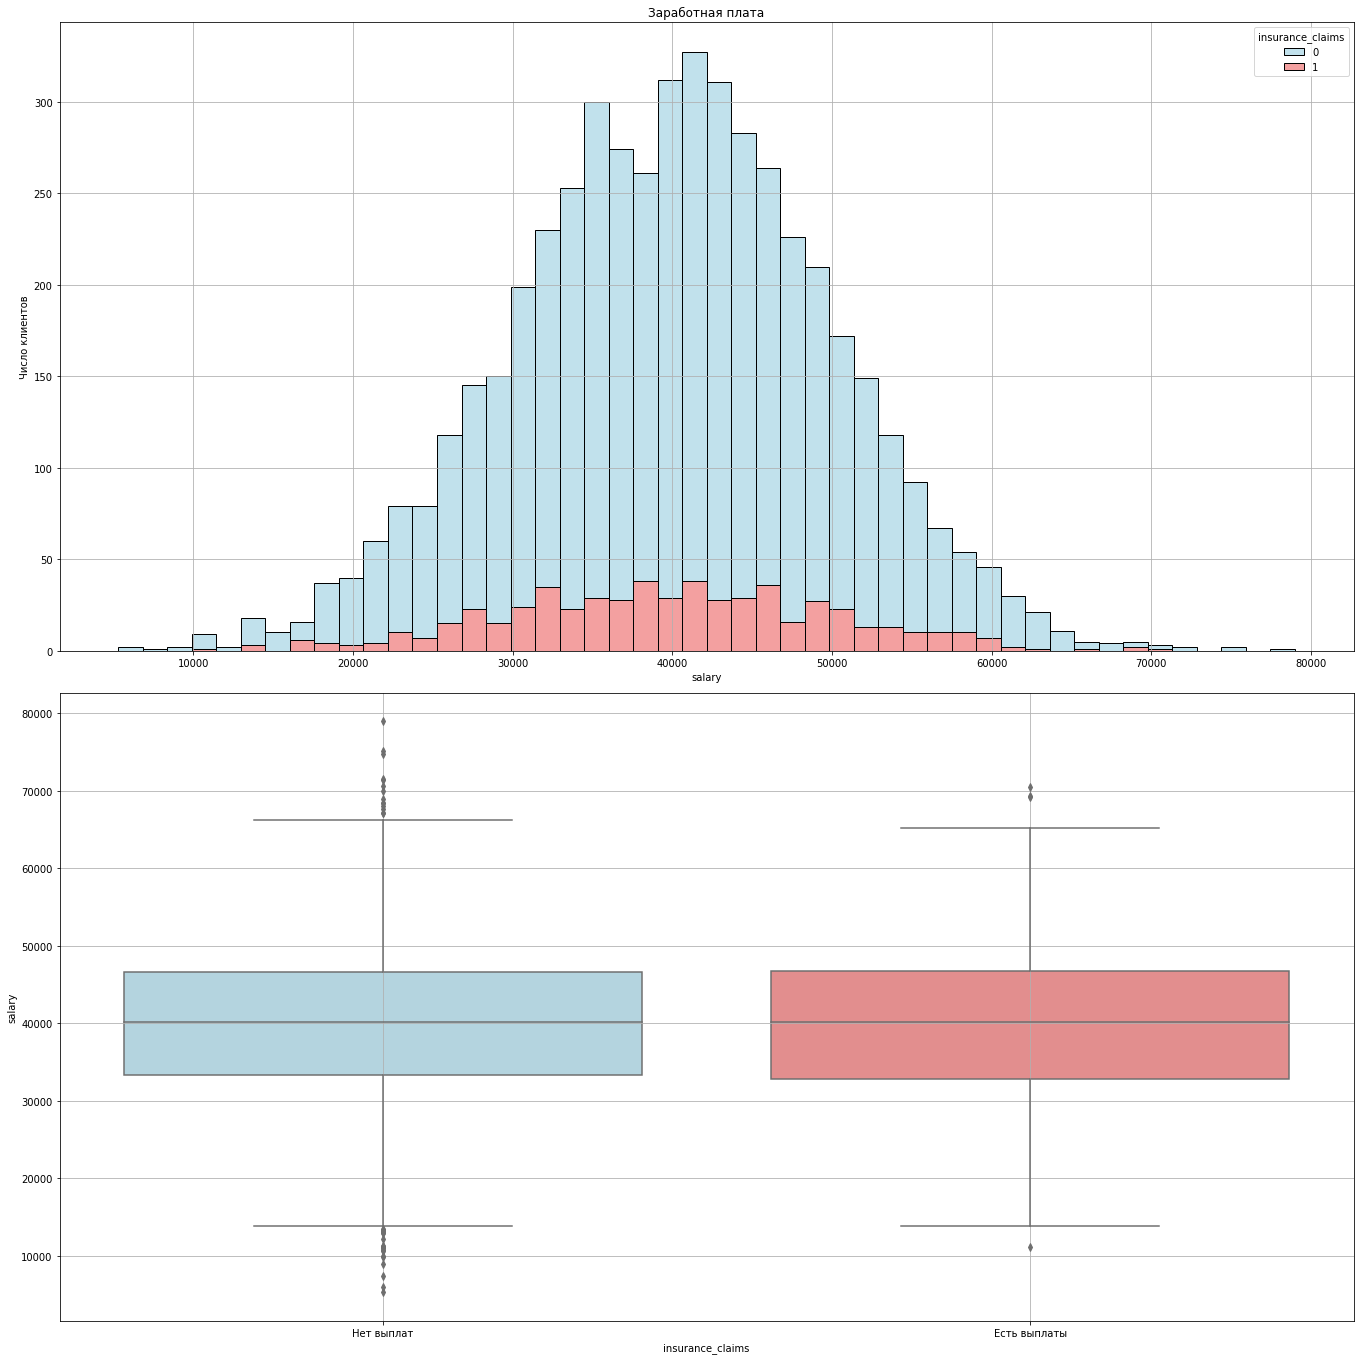

In [16]:
# Вызываем функцию для описания столбца 'salary'
describe_column_numeric('salary', 'Заработная плата')

Распределение клиентов по уровню заработной платы близко к нормальному, с средним значением около 40000. Отмечается, что распределение клиентов по наличию/отсутствию страховых выплат практически идентично или очень похоже.

**Количество членов семьи**

Признак family_members :
count    5000.000000
mean        1.194200
std         1.091387
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: family_members, dtype: float64


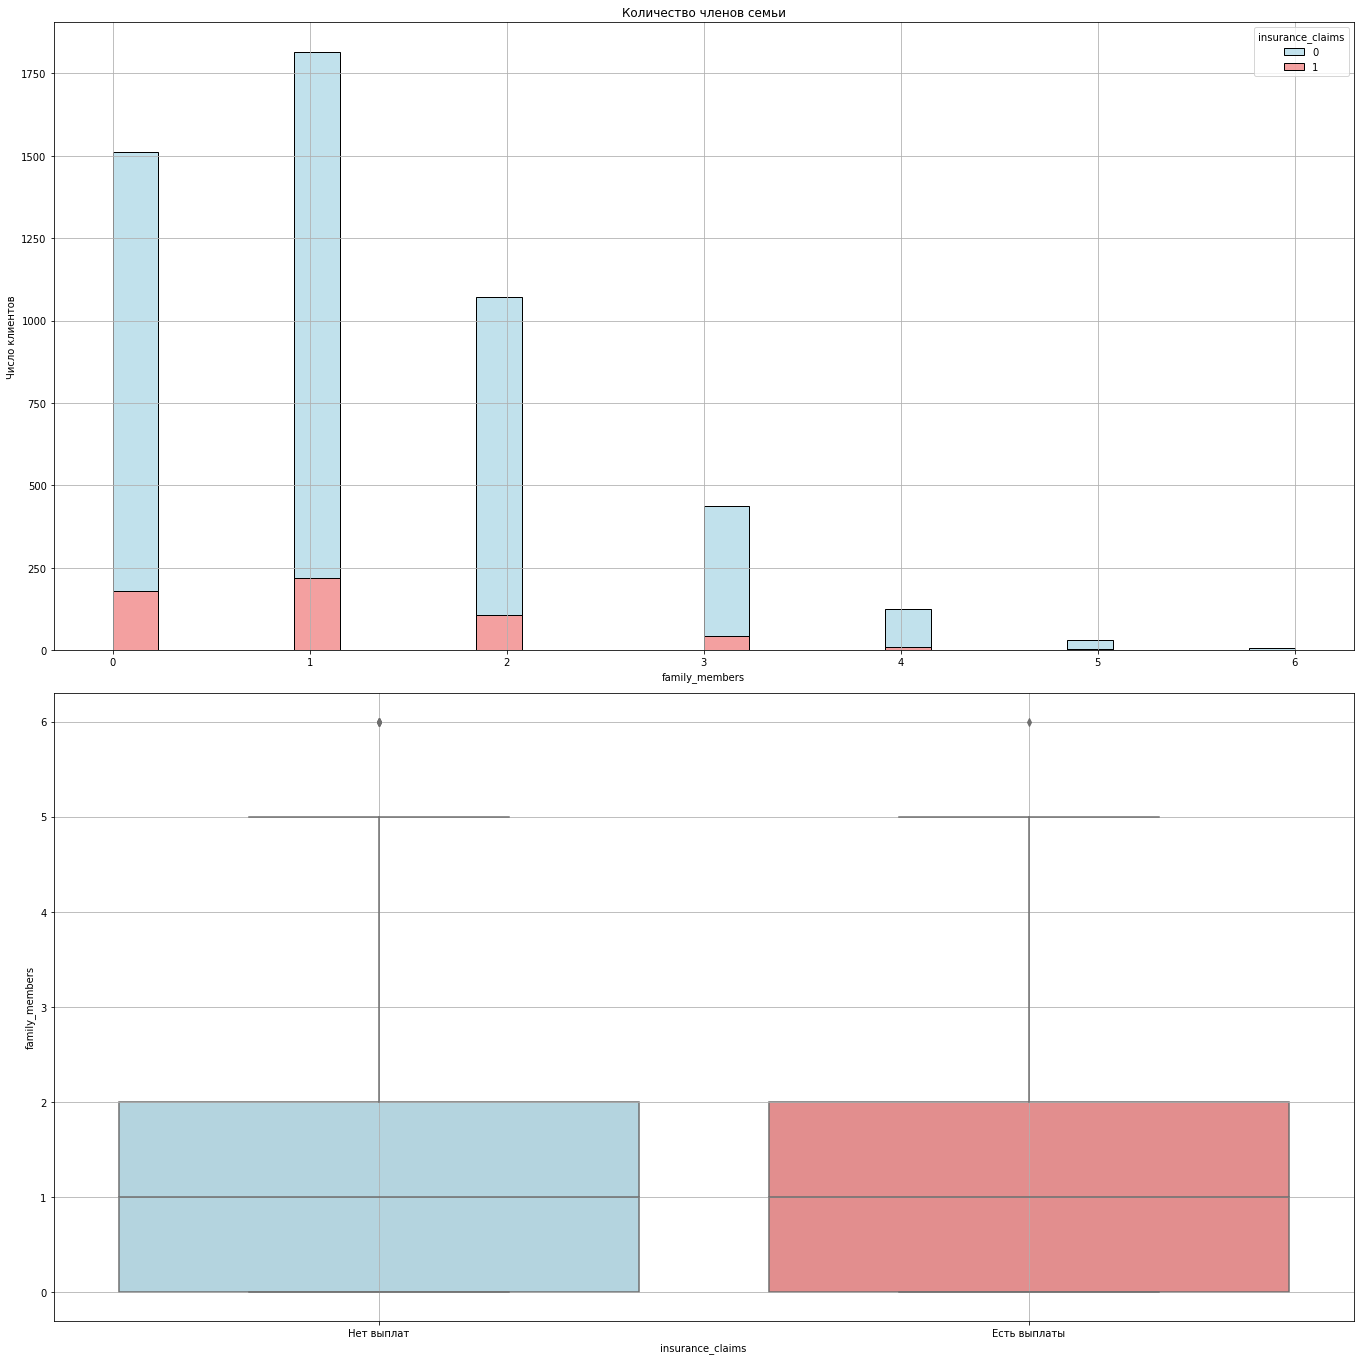

In [17]:
# Вызываем функцию для описания столбца 'family_members'
describe_column_numeric('family_members', 'Количество членов семьи')

Распределение клиентов по числу членов семьи напоминает форму распределения Пуассона, с медианным значением в 1 член семьи (помимо клиента). Отмечается, что распределение клиентов по наличию/отсутствию страховых выплат практически идентично или очень похоже.

**Проверка корреляций**

Для проведения анализа оценим взаимосвязи между обучающими признаками и целевым признаком, а также проанализируем возможное наличие мультиколлинеарности между обучающими признаками.

In [18]:
# Реализована функция для вывода тепловой карты с коэффициентами корреляции, где каждый элемент матрицы представлен 
# диагональной формой. Для построения тепловой карты используется DataFrame с коэффициентами корреляции.

def print_corr_heatmap(df_corr):
    # Заменяем коэффициенты корреляции на их модули и устанавливаем диагональные элементы в 0
    df_corr = np.abs(df_corr).replace(1, 0)

    # Создаем маску для скрытия верхнего треугольника тепловой карты
    mask = np.zeros_like(df_corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    # Создаем фигуру с размерами 19x12 дюймов
    plt.figure(figsize=(19, 12))

    # Применяем маску к тепловой карте
    df_corr_masked = np.ma.masked_array(df_corr, mask=mask)

    # Отображаем тепловую карту
    plt.imshow(df_corr_masked, cmap='coolwarm')

    # Добавляем цветовую шкалу
    plt.colorbar(label='Значение коэффициента корреляции')

    # Заголовок и подписи осей
    plt.title('Матрица модулей коэффициентов корреляции', fontsize=15)
    plt.ylabel('Признак', fontsize=15)
    plt.xlabel('Признак', fontsize=15)

    # Задаем метки для осей x и y
    plt.xticks(ticks=range(len(df_corr.columns)), labels=df_corr.columns, rotation=90)
    plt.yticks(ticks=range(len(df_corr.columns)), labels=df_corr.columns)

    # Отключаем сетку
    plt.grid(False)

    # Добавляем значения коэффициентов корреляции в ячейки
    for i in range(len(df_corr.columns)):
        for j in range(len(df_corr.columns)):
            if not mask[i, j]:
                text = plt.text(j, i, f"{df_corr.iloc[i, j]:.5f}", ha='center', va='center', color='black')

    # Отображаем график
    plt.show()

In [19]:
# Реализована функция для вывода таблицы с коэффициентами корреляции и тепловой карты, 
# где каждый элемент представлен модулем соответствующего коэффициента. Для вывода используется 
# DataFrame с коэффициентами корреляции.

def print_corr_data(df_region, method='pearson', corr_matrix=True):
    # Вывод заголовка таблицы корреляции
    print('{0}  Таблица корреляции  {0}'.format('+' * 50))
    
    # Вычисление коэффициентов корреляции
    df_corr = df_region.corr(method=method)
    
    # Вывод таблицы корреляции
    display(df_corr)
    
    # Вывод тепловой карты с модулями коэффициентов корреляции
    print_corr_heatmap(df_corr)
    
    # Проверка флага для отображения матрицы рассеяния
    if corr_matrix:
        # Создание фигуры с размерами 12x12 дюймов
        fig, ax = plt.subplots(figsize=(19, 19))
        
        # Отображение матрицы рассеяния
        pd.plotting.scatter_matrix(df_region, ax=ax)
        
        # Показ графика
        plt.show()

++++++++++++++++++++++++++++++++++++++++++++++++++  Таблица корреляции  ++++++++++++++++++++++++++++++++++++++++++++++++++


,gender,age,salary,family_members,insurance_payments
gender,1.000000,0.002074,0.014910,-0.008991,0.010140
age,0.002074,1.000000,-0.019093,-0.006692,0.651030
salary,0.014910,-0.019093,1.000000,-0.030296,-0.014963
family_members,-0.008991,-0.006692,-0.030296,1.000000,-0.036290
insurance_payments,0.010140,0.651030,-0.014963,-0.036290,1.000000


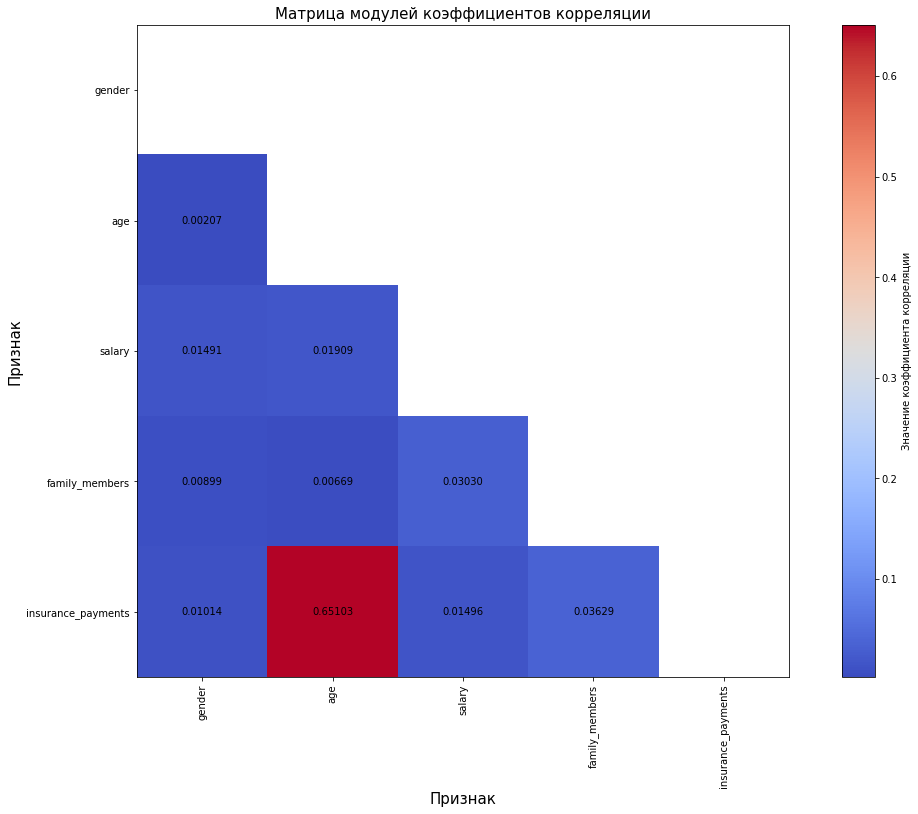

/tmp/ipykernel_222/3237929230.py:24: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(df_region, ax=ax)


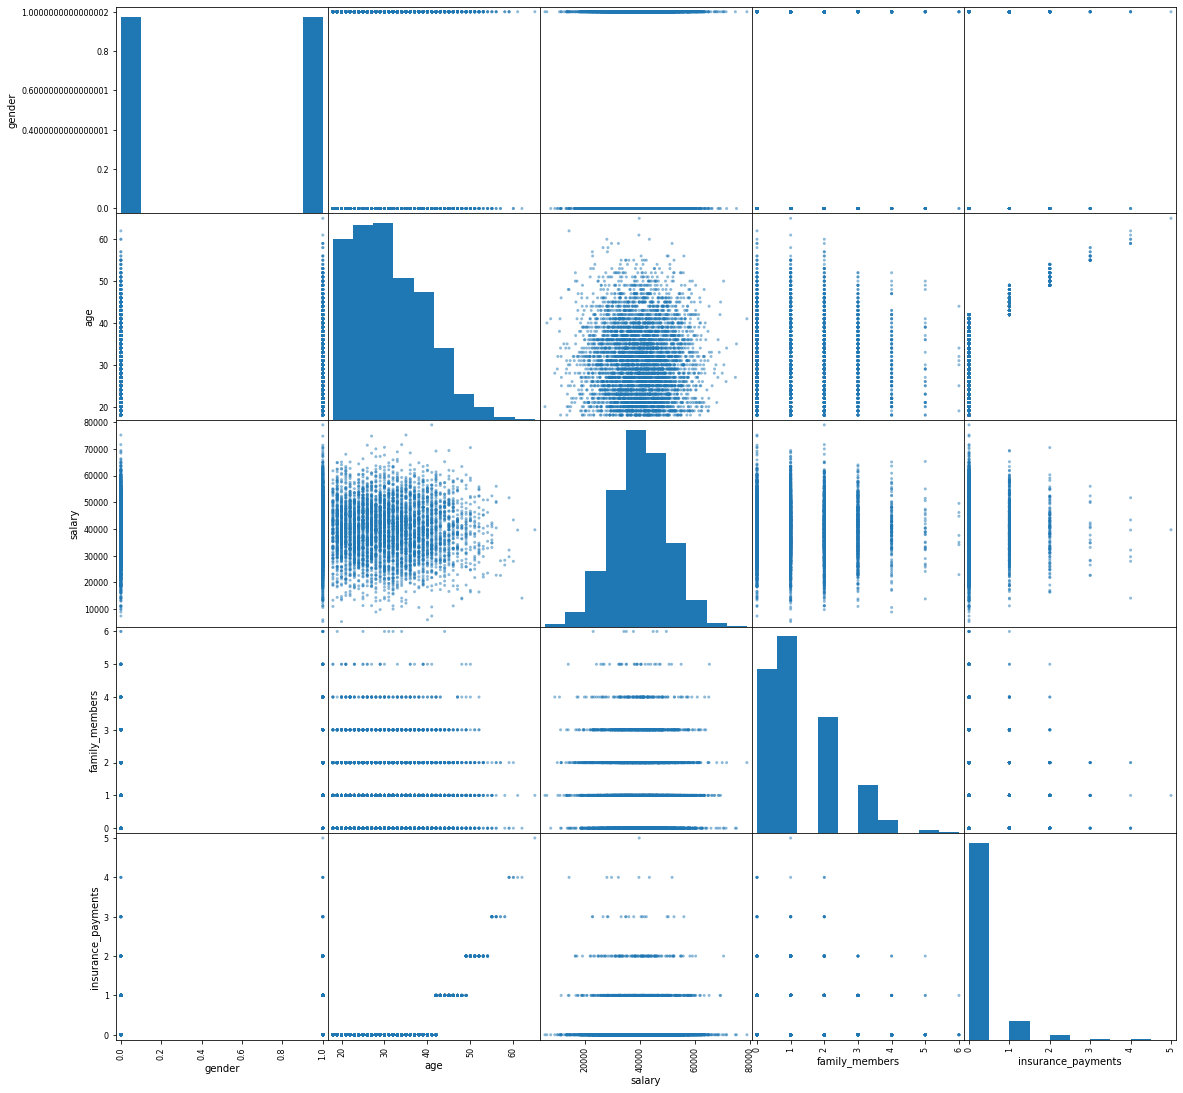

In [20]:
print_corr_data(data_pers[features + target])

Между обучающими признаками нет значительных корреляций. Наиболее сильная корреляция наблюдается между целевым и обучающим признаком, и это связано с возрастом (что ожидаемо, учитывая рассмотренное ранее распределение по возрасту и наличию/отсутствию страховых выплат).

**Выводы**

Исходные данные о клиентах страховой компании «Хоть потоп» представлены в виде таблицы, состоящей из 5000 записей о клиентах. В таблице присутствуют обучающие признаки, такие как пол, возраст, зарплата застрахованного клиента и количество членов его семьи, а также целевой признак - количество страховых выплат клиенту за последние 5 лет. Пропуски данных отсутствуют, и все значения атрибутов приведены к целочисленному типу.

В ходе проведенной оценки корреляций между обучающими признаками и целевым признаком было выявлено, что наиболее коррелирующий с целевым признаком является возраст. Более того, имеется выраженное разделение по возрасту в отношении наличия/отсутствия страховых выплат: все клиенты старше 42 лет имели страховые выплаты, в то время как моложе 42 лет - нет. В связи с этим, рекомендуется провести стратифицированное разделение по возрасту (по границе 42 лет) при формировании обучающей и тестовой выборок.

## Умножение матриц

**Задача:Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)?**

Мы рассматриваем задачу обучения линейной регрессии, где признаки умножаются на обратимую матрицу. Хотим узнать, как изменится качество линейной регрессии после этой операции. Мы можем переобучить модель заново.

Для исходной задачи обучения линейной регрессии приведены следующие обозначения:

- $X_{(n*k)}$ - матрица признаков (нулевой столбец состоит из единиц), где $k$ - размерность признакового пространства.
- $y_{(n*1)}$ - вектор целевого признака.
- $w_{(k*1)}$ - вектор весов линейной регрессии (нулевой элемент равен сдвигу).
- $y_{pred\,(n*1)}$ - вектор предсказаний целевого признака, где $y_{pred} = Xw$.
- $P_{(k*k)}$ - обратимая матрица, на которую умножаются признаки.

Исходная задача обучения линейной регрессии формулируется следующим образом:

$$w = \arg\min_w MSE(Xw, y)$$

То есть мы ищем такое значение $w$, при котором функция $MSE(y_{pred}, y)$ достигает минимума. Метрика ошибки MSE (среднеквадратическая ошибка) между векторами предсказанных и исходных значений целевого признака должна быть минимальной.

Решением исходной задачи обучения линейной регрессии является вектор $w$, определяемый следующим образом:

$$w = (X^T X)^{-1} X^T y$$

Где:
- $X^T$ - транспонированная матрица $X$.
- $(X^T X)^{-1}$ - обратная матрица, полученная из произведения $X^T X$.

**Сформулируем решаемую нами задачу**:

**Дано**: Матрица $P_{(k*k)}$ такая, что существует обратная матрица $P_{(k*k)}^{-1}$, и произведение $P*P^{-1}$ равно единичной матрице $E$.

Наша задача - ответить на следующий вопрос: Как изменится качество линейной регрессии, если мы умножим матрицу $X$ на матрицу $P$?

У нас есть два возможных варианта ответа:
1. Качество линейной регрессии изменится. В этом случае требуется привести примеры таких матриц $P$.
2. Качество линейной регрессии не изменится. В этом случае требуется объяснить, как связаны параметры линейной регрессии в исходной задаче и после преобразования.

**При решении данной задачи мы будем использовать следующие основные свойства матриц:**

1. Умножение любой квадратной матрицы на единичную матрицу даёт исходную матрицу:
   $E \cdot A = A \cdot E = A$

2. Обратная матрица транспонированной матрицы равна транспонированной обратной матрице:
   $(A^T)^{-1} = (A^{-1})^T$

3. Обратная матрица произведения двух матриц равна произведению обратных матриц в обратном порядке:
   $(A \cdot B)^{-1} = (B^{-1} \cdot A^{-1})$

4. Транспонированная матрица произведения двух матриц равна произведению транспонированных матриц в обратном порядке:
   $(A \cdot B)^T = B^T \cdot A^T$
   
**Решение:**

Пусть $X^*$ обозначает матрицу $X$, умноженную на матрицу $P$. Очевидно, что размерность матрицы $X^*$ совпадает с размерностью матрицы $X$.

Тогда вектор весов линейной регрессии $w^*$ может быть выражен следующим образом:

$w^* = (X^{*T} X^*)^{-1} X^{*T} y = ((XP)^T XP)^{-1} (XP)^T y = (P^T X^T X P)^{-1} P^T X^T y = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y = P^{-1} (X^T X)^{-1} E X^T y = P^{-1} (X^T X)^{-1} X^T y = P^{-1} w$

Таким образом, получаем соотношение:

$w^* = P^{-1} w$

А значит, вектор предсказаний целевого признака $y_{pred}^*$ будет равен:

$y_{pred}^* = X^* w^* = X P P^{-1} w = X E w = Xw = y_{pred}$

**Ответ:**

При умножении матрицы признаков $X$ на обратимую матрицу $P$ качество линейной регрессии не изменяется. В этом случае вектор весов линейной регрессии $w^{*}$ может быть выражен как $w^{*} = P^{-1} w$.

**Вывод:**

Качество линейной регрессии, измеряемое среднеквадратической ошибкой (MSE), остается неизменным после умножения матрицы признаков на обратимую матрицу.
Вектор весов линейной регрессии после преобразования может быть выражен как произведение обратной матрицы $P^{-1}$ и исходного вектора весов $w$.

## Алгоритм преобразования

Рассмотрим частный случай матрицы признаков размерности 5x5, где первый столбец представляет собой вектор единиц, а остальные 4 столбца соответствуют обучающим признакам (Пол, Возраст, Зарплата, Количество членов семьи). Для обработки такой матрицы признаков мы можем использовать произвольную обратимую матрицу размерности 4x4 для их преобразования.

Для демонстрации применимости этого подхода даже для данного частного случая 5x5, мы выполняем следующие шаги в коде:

1. Генерируем исходную матрицу признаков X размерности 5x4.
2. Генерируем матрицу P размерности 4x4 с использованием функции `pascal` из модуля `scipy.linalg`.
3. Вычисляем обратную матрицу inv_P для матрицы P с помощью функции `np.linalg.inv`.
4. Умножаем исходную матрицу признаков X на обратную матрицу inv_P, получая преобразованную матрицу X_transformed.
5. Добавляем столбец из единиц к преобразованной матрице X_transformed, чтобы получить полную матрицу признаков для применения сокращенной формулы предсказания.
6. Генерируем случайный вектор весов w размерности 5.
7. Вычисляем предсказания y_pred с использованием преобразованных признаков X_transformed и вектора весов w.

Таким образом, в результате получаем преобразованную матрицу признаков X_transformed, которую мы можем использовать для применения формулы предсказания линейной регрессии $a = Xw$. Это преобразование позволяет сохранить свойства линейной регрессии и обеспечивает независимость от размерности признакового пространства.

**Генерируем матрицу исходных признаков размерности 5x4**

In [21]:
# Генерация случайной матрицы размером 5x4
# np.random.rand генерирует значения от 0 до 1 с равномерным распределением
X = np.random.rand(5, 4)

# Вывод матрицы исходных признаков X
print("Матрица исходных признаков X:")
print(X)

Матрица исходных признаков X:
[[0.42456997 0.14889236 0.25916203 0.63921873]
 [0.83093195 0.27264994 0.88360884 0.052261  ]
 [0.64843782 0.02730476 0.74382859 0.31378562]
 [0.38363218 0.24064778 0.97666236 0.8366179 ]
 [0.96393115 0.17261288 0.52990008 0.06253378]]


**Генерируем матрицу P размерности 4x4**

In [22]:
# Создание матрицы Паскаля размером 4x4 с параметрами kind='lower' и exact=True
# kind='lower' указывает, что нужно создать нижнюю треугольную матрицу Паскаля
# exact=True указывает, что нужно использовать целочисленные значения вместо чисел с плавающей запятой
p_matrix = pascal(4, kind='lower', exact=True)

# Вывод матрицы Паскаля
print("\nМатрица P:")
print(p_matrix)


Матрица P:
[[1 0 0 0]
 [1 1 0 0]
 [1 2 1 0]
 [1 3 3 1]]


**Вычисляем обратную матрицу для матрицы P**

In [23]:
# Вычисление обратной матрицы для матрицы P с использованием np.linalg.inv
inv_p_matrix = np.linalg.inv(p_matrix)

# Вывод обратной матрицы P
print("\nОбратная матрица P:")
print(inv_p_matrix)


Обратная матрица P:
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.00000000e+00  1.00000000e+00  1.11022302e-16  0.00000000e+00]
 [ 1.00000000e+00 -2.00000000e+00  1.00000000e+00 -0.00000000e+00]
 [-1.00000000e+00  3.00000000e+00 -3.00000000e+00  1.00000000e+00]]


**Умножаем матрицу исходных признаков на матрицу P**

In [24]:
# Шаг 1: Выполнение умножения матрицы X на обратную матрицу P
X_transformed = np.dot(X, inv_p_matrix)

# Шаг 2: Добавление столбца из единиц к преобразованной матрице X_transformed
# Мы используем np.column_stack для объединения матрицы из единичного столбца
# и преобразованной матрицы X_transformed по столбцам
X_transformed = np.column_stack((np.ones(X_transformed.shape[0]), X_transformed))

# Шаг 3: Вывод преобразованной матрицы X_transformed
print("\nПреобразованная матрица X_transformed:")
print(X_transformed)


Преобразованная матрица X_transformed:
[[ 1.         -0.10437909  1.5482245  -1.65849416  0.63921873]
 [ 1.          1.38962986 -1.33778477  0.72682586  0.052261  ]
 [ 1.          1.05117603 -0.51899555 -0.19752827  0.31378562]
 [ 1.          0.28302886  0.79717676 -1.53319134  0.8366179 ]
 [ 1.          1.25868456 -0.69958592  0.34229872  0.06253378]]


**Вектор весов линейной регрессии**

In [25]:
# Генерация случайного вектора весов размером 5
# Функция np.random.rand генерирует значения от 0 до 1 с равномерным распределением
w = np.random.rand(5)

# Вывод вектора весов w
print("\nВектор весов w:")
print(w)


Вектор весов w:
[0.18396227 0.5307285  0.55826912 0.60622908 0.38675543]


**Предсказание с использованием преобразованных признаков**

In [26]:
# Вычисление предсказаний y_pred с использованием скалярного произведения
# между преобразованной матрицей X_transformed и вектором весов w
y_pred = np.dot(X_transformed, w)

# Вывод предсказаний y_pred
print("\nПредсказание y_pred:")
print(y_pred)


Предсказание y_pred:
[0.23468516 0.6354697  0.45372306 0.17331425 0.69312153]


После применения преобразования признаков с использованием матрицы P и вектора весов w, мы получаем следующие результаты:

Матрица исходных признаков X содержит пять наблюдений (строк) и четыре признака (столбца).

Матрица P представляет собой нижнетреугольную матрицу Паскаля размерности 4x4. Она используется для преобразования признаков.

Обратная матрица P⁻¹ вычисляется для матрицы P и также имеет размерность 4x4.

Преобразованная матрица X_transformed получается путем умножения матрицы исходных признаков X на обратную матрицу P⁻¹. К ней также добавляется столбец из единиц, необходимый для использования сокращенной формы предсказания.

Вектор весов линейной регрессии w имеет пять элементов.

Предсказание y_pred вычисляется путем умножения преобразованной матрицы X_transformed на вектор весов w.

Таким образом, мы имеем преобразованные признаки X_transformed и предсказания y_pred, которые можно использовать для анализа и дальнейших задач машинного обучения. Применение преобразования позволяет учесть взаимосвязь между признаками и достичь более точных предсказаний с использованием линейной регрессии.

## Проверка алгоритма

Для проверки отсутствия влияния преобразования на качество линейной регрессии, мы проведём обучение модели на исходных данных и на данных, преобразованных с использованием описанного выше метода. Обучение модели будет выполняться с помощью библиотеки sklearn, а неизменность качества будет проверяться с использованием метрики R2.

Это позволит нам сравнить результаты обучения модели на исходных данных и на преобразованных данных и убедиться в отсутствии влияния преобразования на качество модели.

### Обучение на исходных данных

Мы добавим дополнительный атрибут, отражающий возрастную категорию, для проведения стратифицированного разделения исходных данных.

Это позволит нам учесть различия в возрастных группах при разделении данных, чтобы обеспечить более равномерное распределение примеров разных возрастных категорий между обучающим и тестовым наборами.

**Создаем новый столбец age_category**

In [27]:
# Создаем новый столбец 'age_category' в DataFrame 'data_pers', содержащий значения True или False
# в зависимости от того, является ли возраст (столбец 'age') меньше 42
data_pers['age_category'] = data_pers['age'] < 42

**Разделяем данные из DataFrame `data_pers` на обучающий и тестовый наборы**

In [28]:
# Разделяем данные на обучающую и тестовую выборки

df_train, df_test = train_test_split( #df_train (обучающий набор) и df_test (тестовый набор)
    data_pers, # data_pers: исходный DataFrame
    test_size=0.2, # test_size=0.2: размер тестовой выборки составляет 20% от всех данных
    random_state=random_state, # random_state=random_state: устанавливаем одинаковое значение для воспроизводимости случайной выборки
    stratify=data_pers['age_category'] # stratify=data_pers['age_category']: выполняем стратифицированное разделение данных
    )

**Сформируем наборы обучающих и целевых признаков для обучающей и тестовой выборок.**

In [29]:
# Выделение признаков и целевого признака для обучающей выборки
# df_train: обучающая выборка
# features: список признаков, которые мы хотим использовать
# target: целевой признак
df_train_X = df_train[features]
df_train_Y = df_train[target]

# Выделение признаков и целевого признака для тестовой выборки
# df_test: тестовая выборка
# features: список признаков, которые мы хотим использовать
# target: целевой признак
df_test_X = df_test[features]
df_test_Y = df_test[target]

**Обучим модель и получим значение метрики R2.**

In [30]:
# Создание объекта модели линейной регрессии
model = LinearRegression()

# Обучение модели на обучающих данных
# df_train_X: признаки обучающей выборки
# df_train_Y: целевой признак обучающей выборки
model.fit(df_train_X, df_train_Y)

# Получение предсказаний на тестовых данных
# df_test_X: признаки тестовой выборки
predictions = model.predict(df_test_X)

# Вычисление метрики R2 для оценки качества модели
# df_test_Y: истинные значения целевого признака тестовой выборки
r2 = r2_score(df_test_Y, predictions)

# Вывод значения метрики R2
print(r2)

0.39966885338128844


### Обучение на преобразованных данных

Теперь мы выполним преобразование исходных признаков путем умножения на обратимую матрицу. Для этого воспользуемся моделью библиотеки sklearn для обучения модели.

В данном случае нам не потребуется добавлять столбец единиц к матрице обучающих признаков, поэтому матрица преобразования должна иметь размерность 4x4.

В качестве примера возьмем нижнетреугольную матрицу Паскаля.

**Генерация нижнетреугольной матрицы Паскаля размерностью 4x4**

In [31]:
# Генерируем нижнетреугольную матрицу Паскаля размерностью 4x4
p_matrix = pascal(4, kind='lower', exact=True)

**Выполним преобразование обучающих признаков обучающей и тестовой выборок.**

In [32]:
# Умножение матрицы обучающих признаков на матрицу преобразования p_matrix
df_train_X_p = df_train[features] @ p_matrix

# Умножение матрицы тестовых признаков на матрицу преобразования p_matrix
df_test_X_p = df_test[features] @ p_matrix

**Обучим модель и получим значение метрики R2.**

In [33]:
# Создание объекта модели линейной регрессии
model = LinearRegression()

# Обучение модели на преобразованных признаках обучающего набора
model.fit(df_train_X_p, df_train_Y)

# Получение предсказаний на преобразованных признаках тестового набора
predictions = model.predict(df_test_X_p)

# Вычисление и вывод метрики R2 для оценки качества модели
print(r2_score(df_test_Y, predictions))

0.3996688533813235


**В качестве другого примера возьмем случайную матрицу, проверим ее обратимость.**

In [34]:
# Установка начального состояния генератора случайных чисел
np.random.seed(random_state)

In [35]:
# Генерация случайной матрицы размерности 4x4
random_matrix = np.random.random((4,4))
random_matrix

array([[0.24580423, 0.59642861, 0.35879163, 0.37891011],
       [0.02445137, 0.23830957, 0.38793433, 0.68054104],
       [0.83934083, 0.76073689, 0.2217416 , 0.06344161],
       [0.77944375, 0.72174137, 0.19413884, 0.51146167]])

In [36]:
# Вычисление обратной матрицы
matrix_inv = np.linalg.inv(random_matrix)
matrix_inv

array([[-3.609827  ,  2.07562415,  2.56477415, -0.40562358],
       [ 4.65809377, -3.53882458, -2.74531807,  1.59832893],
       [-2.25487348,  4.21845113,  4.74519838, -4.53108801],
       [-0.21609317,  0.22937908, -1.83574827,  2.0377692 ]])

**Обучим модель и проверим значение метрики R2 аналогичным образом.**

In [37]:
# Умножение матрицы признаков df_train[features] на обратную матрицу matrix_inv
df_train_X_p = df_train[features] @ matrix_inv

# Умножение матрицы признаков df_test[features] на обратную матрицу matrix_inv
df_test_X_p = df_test[features] @ matrix_inv

In [38]:
# Создание объекта модели линейной регрессии
model = LinearRegression()

# Обучение модели на преобразованных признаках и целевой переменной обучающего набора данных
model.fit(df_train_X_p, df_train_Y)

# Выполнение предсказаний на преобразованных признаках тестового набора данных
predictions = model.predict(df_test_X_p)

# Вычисление значения метрики R2 для сравнения качества модели на тестовых данных
r2 = r2_score(df_test_Y, predictions)

# Вывод значения метрики R2
print(r2)

0.39966885338086555


Полученные значения метрики R2 для всех трех случаев совпадают, что означает, что преобразование путем умножения матрицы обучающих признаков на обратимую матрицу не влияет на качество линейной регрессии.

### Реализация линейной регрессии

Создадим отдельный класс для реализации модели линейной регрессии, в котором мы встроим рассмотренное матричное преобразование.

In [39]:
class LinearRegressionPascal:
    def __init__(self):
        self.p_matrix = None  # Переменная для хранения матрицы Паскаля
        self.w = None  # Переменная для хранения вектора весов

    def fit(self, train_features, train_target):
        # Создаем матрицу Паскаля
        self.p_matrix = pascal(train_features.shape[1], kind='lower', exact=True)
        
        # Умножаем обучающие признаки на матрицу Паскаля
        X = train_features @ self.p_matrix
        
        # Добавляем столбец из единиц к обучающим признакам
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        
        # Обучаем модель линейной регрессии
        y = train_target
        self.w = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict(self, test_features):
        # Умножаем тестовые признаки на матрицу Паскаля
        X_transformed = test_features @ self.p_matrix
        
        # Добавляем столбец из единиц к тестовым признакам
        X_transformed = np.concatenate((np.ones((X_transformed.shape[0], 1)), X_transformed), axis=1)
        
        # Выполняем предсказание с использованием обученных весов
        return X_transformed @ self.w

In [40]:
# Создаем экземпляр класса LinearRegressionPascal
model = LinearRegressionPascal()

# Обучаем модель, используя обучающие признаки и значения целевого признака
model.fit(df_train_X, df_train_Y.values)

# Делаем предсказания на тестовых признаках, используя обученную модель
predictions = model.predict(df_test_X)

# Вычисляем значение коэффициента детерминации (R-квадрат) для оценки предсказаний
r2_score_value = r2_score(df_test_Y, predictions)

# Выводим значение коэффициента детерминации
print(r2_score_value)

0.3996688509538243


В результате использования реализованного класса LinearRegressionPascal мы также получаем значения метрики R2, которые совпадают с предыдущими значениями. Это подтверждает правильность встроенного матричного преобразования внутри модели линейной регрессии и его невлияние на качество предсказания.

# Выводы

В данном исследовании мы изучили исходные данные о клиентах страховой компании "Хоть потоп" и определили обучающие и целевые признаки. Обучающие признаки включают пол, возраст, зарплату застрахованного клиента и количество членов его семьи. Целевым признаком является количество страховых выплат клиенту за последние 5 лет.

Мы провели анализ корреляций между обучающими и целевым признаками, а также изучили распределение значений обучающих признаков. Было обнаружено, что наиболее коррелирующим с целевым признаком является возраст.

Далее мы рассмотрели решение задачи обучения модели линейной регрессии с использованием матричных операций. Также было проведено доказательство того, что качество линейной регрессии не изменяется при умножении матрицы обучающих признаков на произвольную обратимую матрицу.

В рамках исследования мы также рассмотрели частный случай данного преобразования - умножение матрицы обучающих признаков на различные обратимые матрицы. Мы проверили неизменность метрики R2 на практике и результаты совпали с теоретическим доказательством.

Полученное преобразование матрицы обучающих признаков может быть полезно при необходимости преобразования данных, например, для обеспечения защиты персональной информации. В зависимости от поставленной задачи, можно выбирать различные обратимые матрицы, чтобы выполнить требуемое преобразование.

Таким образом, мы продемонстрировали эффективность и применимость данного матричного преобразования в контексте линейной регрессии.

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования